In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Days': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Weather': ['Sunny', 'Sunny', 'Cloudy', 'Rain', 'Rain', 'Rain', 'Cloudy', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Cloudy', 'Cloudy', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Create DataFrame
df = pd.DataFrame(data)

df

,Days,Weather,Temperature,Humidity,Wind,Play
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Cloudy,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes
5,6,Rain,Cool,Normal,Strong,No
6,7,Cloudy,Cool,Normal,Strong,Yes
7,8,Sunny,Mild,High,Weak,No
8,9,Sunny,Cool,Normal,Weak,Yes
9,10,Rain,Mild,Normal,Weak,Yes


Accuracy: 0.60


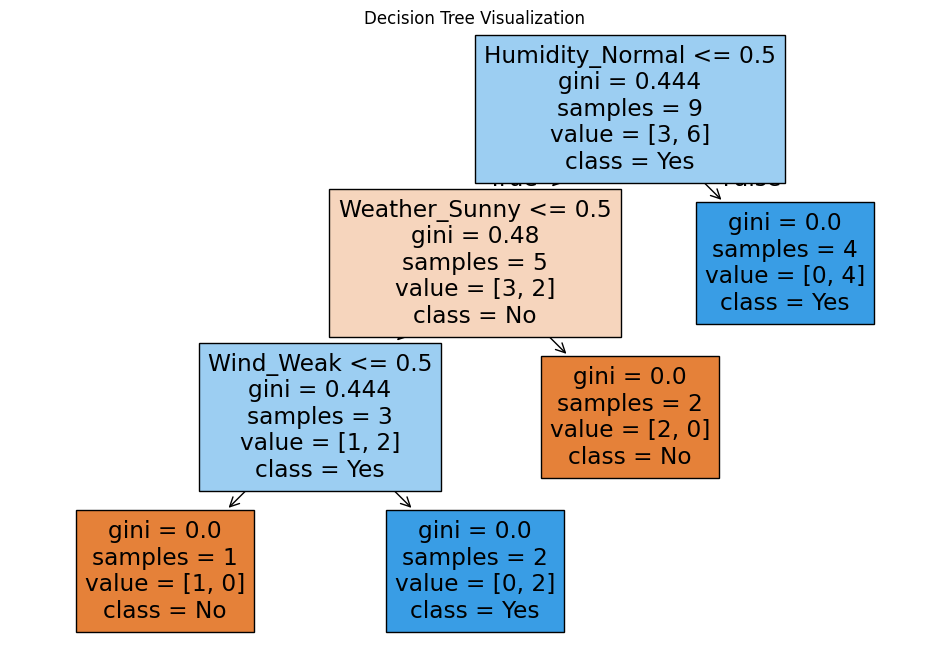

In [3]:
# Encode categorical features
df_encoded = pd.get_dummies(df.drop(['Days', 'Play'], axis=1), drop_first=True)
X = df_encoded
y = df['Play'].map({'Yes': 1, 'No': 0})  # Convert target variable to binary

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predicting on test set
y_pred = clf.predict(X_test)

# Print the accuracy
accuracy = clf.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree Visualization')
plt.savefig('decision_tree.png',format = 'png')
plt.show()
